In [16]:
import numpy as np
import matplotlib.pyplot as plt        # Import matplotlib for charts
from utils_nb import plot_vectors 
import pprint 

pp = pprint.PrettyPrinter(indent=4) # Instantiate a pretty printer

In [2]:
A = np.array([[2,2],[2,2]])
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

In [3]:
A_Frobenious = np.sqrt(np.sum(A_squared))
A_Frobenious

4.0

In [4]:
R = np.array([[-2, 0],
              [0, 2]])
R

array([[-2,  0],
       [ 0,  2]])

In [5]:
x = np.array([[1, 1]]) # Create a row vector as a NumPy array with a single row
x

array([[1, 1]])

In [6]:
y = np.dot(R, x.T) # Apply the dot product between R and x.T
y  

array([[-2],
       [ 2]])

In [7]:
# plot the vector  𝑥⃗ =[1,1] in a cartesian plane

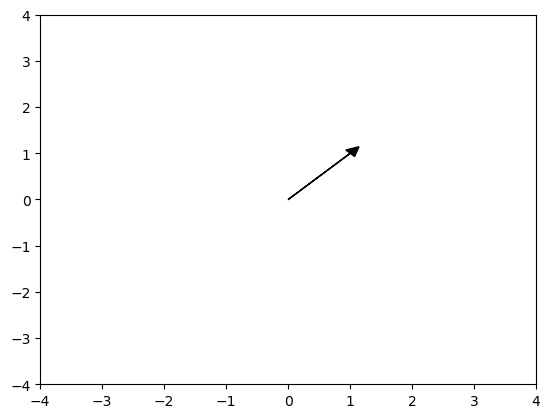

In [8]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

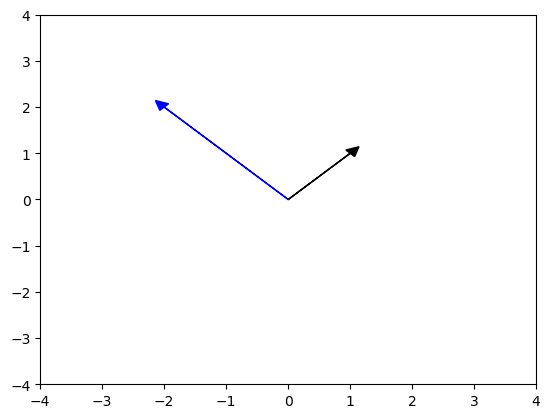

In [9]:
#plot in the same system our vector  𝑥⃗ =[1,1]and the dot product of the matrix with  𝑥.𝑇
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

In [12]:
angle = 100 * (np.pi / 180) # Convert degrees to radians

In [13]:
Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([[2, 2]])    # Row vector as a NumPy array
y2 = np.dot(Ro, x2.T)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[-2.31691186]
 [ 1.62231915]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


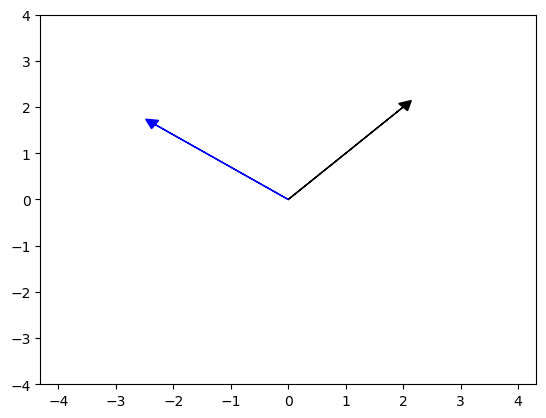

In [14]:
plot_vectors([x2, y2], fname='transform_02.svg')

In [15]:
print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095


In [17]:
def hash_multiple_plane(P_l,v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2** i* hash_i
    return hash_value
# add the score for the ith plane to the hash value by computing 2^i *hi


In [19]:
#receive a list of integer numbers and the desired amount of buckets.
def basic_hash_table(value_l, n_buckets):
    def hash_function(value, n_buckets):
        
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)} # creates a dictionary where each key is a number from 0 to n_buckets - 1

    for value in value_l:#a for loop that iterates over a list of values (value_l)
        hash_value = hash_function(value,n_buckets) # Get the hash key for the given value
        hash_table[hash_value].append(value) # Add the element to the corresponding bucket
    
    return hash_table

In [20]:
value_l = [100, 10, 14, 17, 97] # Set of values to hash
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


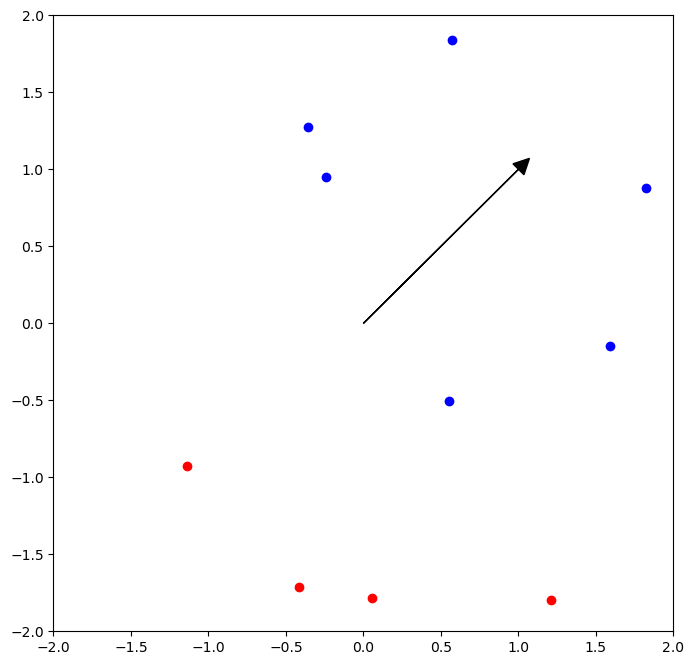

In [22]:
#multiplanes principle
P = np.array([[1, 1]]) # Define a single plane. 
fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot
plot_vectors([P], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot random points. 
for i in range(0, 10):
        v1 = np.array(np.random.uniform(-2, 2, 2)) # Get a pair of random numbers between -2 and 2
        side_of_plane = np.sign(np.dot(P, v1.T)) 
        
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot red points

plt.show()
#does not mark the boundary between the two sides of the plane

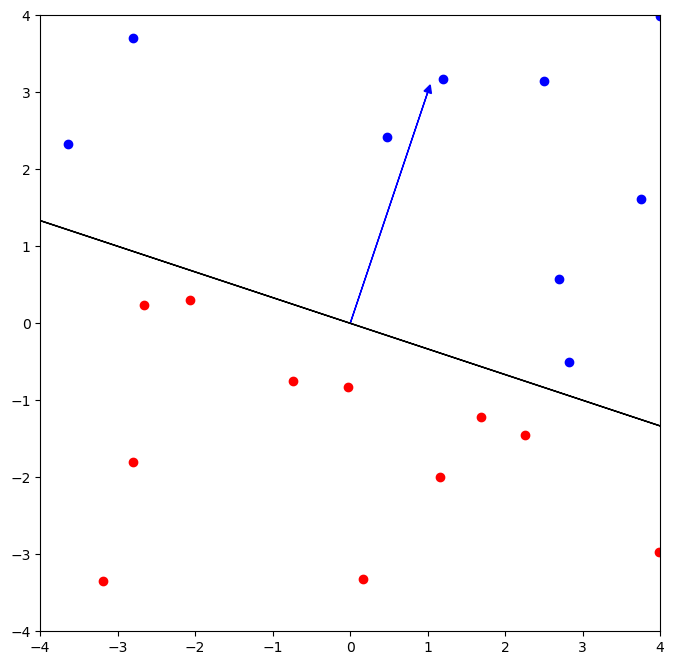

In [24]:
P = np.array([[1, 3]]) # Define a single plane. 

# Get a new plane perpendicular to P. We use a rotation matrix R(theta) = ([[cos,-sin],[sin,cos]]) theta= -pi/2
PT = np.dot([[0, 1], [-1, 0]], P.T).T  

fig, ax1 = plt.subplots(figsize=(8, 8)) # Create a plot with custom size

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot the plane P as a 2 vectors. 
# We scale by 2 just to get the arrows outside the current box
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax1)

# Plot 20 random points. 
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4 
        side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax1.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
        else:
            ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

plt.show()
#create a boundary between the two sides of the plane

In [25]:
P = np.array([[1, 1]])      # Single plane
v1 = np.array([[1, 2]])     # Sample point 1
v2 = np.array([[-1, 1]])    # Sample point 2
v3 = np.array([[-2, -1]])   # Sample point 3

In [26]:
np.dot(P, v1.T)

array([[3]])

In [27]:
np.dot(P, v2.T)

array([[0]])

In [28]:
np.dot(P, v3.T)

array([[-3]])

In [30]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v'
    sign_of_dot_product = np.sign(dotproduct) # The sign of the elements of the dotproduct matrix 
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [31]:
side_of_plane(P, v1)

1

In [32]:
side_of_plane(P, v2) # In which side is [-1, 1]

0

In [33]:
side_of_plane(P, v3) # In which side is [-2, -1]

-1

In [34]:
P1 = np.array([[1, 1]])   # First plane 2D
P2 = np.array([[-1, 1]])  # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3]  # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])

In [37]:
def hash_multiple_plane(P_l,v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P,v)
        hash_i = 1 if sign >= 0 else 0 
        hash_value += 2**i* hash_i
    return hash_value

In [38]:
hash_multiple_plane(P_l,v)

3

In [52]:
#Random Planes
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(
                       size=(num_planes,
                             num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [54]:
v = np.array([[2, 2]])

In [55]:
#similar to the side_of_plane() function, but it evaluates more than a plane each time
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Get a boolean value telling if the value in the cell is positive or negative
    return sign_of_dot_product

In [56]:
sides_l = side_of_plane_matrix(
            random_planes_matrix, v)
sides_l

array([[1.],
       [1.],
       [1.]])

In [93]:
def hash_multiple_matrix(P, v, num_planes):
    hash_i = (side_of_plane_matrix(P, v) >= 0).astype(int)
    weights = 2 ** np.arange(num_planes)
    hash_value = np.dot(hash_i.T, weights).item()
    return hash_value
  

In [94]:
hash_multiple_matrix(random_planes_matrix, v, num_planes)

7

In [95]:
#can represent a document as a vector by adding up the word vectors for the words inside the document
word_embedding = {"I": np.array([1,0,1]),
                   "love": np.array([-1,0,1]),
                   "learning": np.array([1,0,1])
                  }
words_in_document = ['I', 'love', 'learning', 'not_a_word']
document_embedding = np.array([0,0,0])
for word in words_in_document:
    document_embedding += word_embedding.get(word,0)
    
print(document_embedding)

[1 0 3]


In [ ]:
#best way to divide up the space
